# Starter Notebook: AIMS Data Science Hackathon by Microsoft

Welcome! This starter notebook is designed to get you started on the AIMS Data Science Hackathon, where you will be attempting to predict a measure of wealth for different locations across Africa. We will take a look at the data, create a model and then use that to make our first submission. After that we will briefly look at some ways to improve. Let's get started.

# Loading the Data

We're using the pandas library to load the data into dataframes - a tabular data structure that is perfect for this kind of work. Each of the three CSV files from Zindi is loaded into a dataframe and we take a look at the shape of the data (number of rows and columns) as well as a preview of the first 5 rows to get a feel for what we're working with.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = pd.read_csv('/content/drive/MyDrive/zindi_hackathon/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/zindi_hackathon/Test.csv')
print(train.shape)
train.head()

(21454, 19)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In train, we have a set of inputs (like 'urban_or_rural' or 'ghsl_water_surface') and our desired output variable, 'Target'. There are 21454 rows - lots of juicy data!

In [6]:
test = pd.read_csv('/content/drive/MyDrive/zindi_hackathon/Test.csv')
print(test.shape)
test.head()

(7194, 18)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [13]:
train.columns

Index(['ID', 'country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'Target'],
      dtype='object')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

In [7]:
test

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,ID_zxzKJCMI,Zimbabwe,2010,R,0.000000,0.000000,0.000000,0.000016,0.000131,0.999853,0.304446,32.263180,0.658724,0.000000,0.077742,0.103892,500.988790,703.139988
7190,ID_zyBrpgRp,Uganda,2011,U,0.000000,0.000056,0.000883,0.003861,0.002483,0.992717,36.160182,27.520555,3.615442,0.000000,0.001157,0.000000,159.587852,1000.194893
7191,ID_zyMafcYq,Burkina Faso,2010,U,0.002683,0.000268,0.002800,0.009322,0.042527,0.942399,46.127465,35.674511,12.705561,0.001129,0.723252,4.734974,33.775441,781.833777
7192,ID_zyfMsHMG,Zimbabwe,2011,R,0.000332,0.000000,0.000017,0.000000,0.000100,0.999551,0.309696,18.050789,0.030514,0.033177,0.222629,0.175123,320.974153,605.920204


Test looks just like train but without the 'Target' column and with fewer rows.

In [10]:
train['country'].describe()

count       21454
unique         18
top       Nigeria
freq         2695
Name: country, dtype: object

In [11]:
ss = pd.read_csv('/content/drive/MyDrive/zindi_hackathon/SampleSubmission.csv')
print(ss.shape)
ss.head()

(7194, 2)


,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


The sample submission is just the ID column from test with a 'Target' column where we will put out predictions.

Now that we have the data loaded, we can start exploring.

# EDA

We will explore some trends in the data and look for any anomalies such as missing data. A few examples are done here but you can explore much further yourself and get to know the data better.

First up: let's see how an input like 'nighttime lights' relates to the target column:

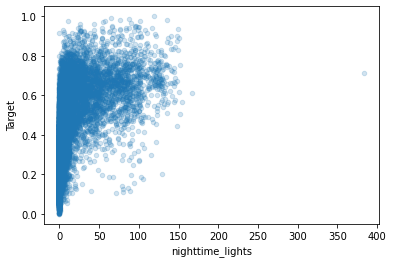

In [15]:
# Plotting the relationship between an input column and the target
train.plot(x='nighttime_lights', y='Target', kind='scatter', alpha=0.2)
plt.show()

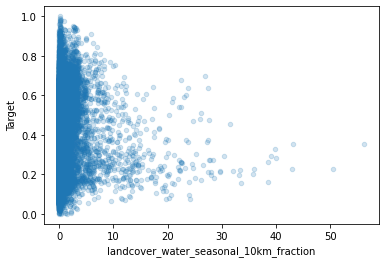

In [16]:
# Exercise: Try this with different inputs. Any unexpected trends?
train.plot(x='landcover_water_seasonal_10km_fraction', y='Target', kind='scatter', alpha=0.2)
plt.show()

As you might have guessed, places that emit more light tend to be wealthier, but there is a lot of variation.

We can also look at categorical columns like 'country' or 'urban_vs_rural' and see the distribution of the target for each group:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


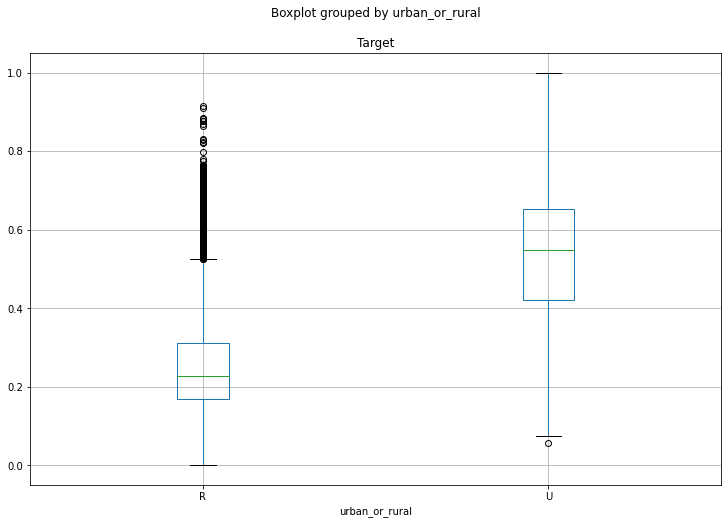

In [17]:
# Looking at the wealth distribution for urban vs rural
train.boxplot(by='urban_or_rural', column='Target', figsize=(12, 8))
plt.show()

In [ ]:
# Exercise: which is the country with the higest average wealth_index according to this dataset?

Again, not unexpected. Rural areas tend to be less wealthy than urban areas.

Now the scary question: do we have missing data to deal with?

In [18]:
train.isna().sum() # Hooray - no missing data!

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

See what other trends you can uncover - we have only scratched the surface here. 

In [ ]:
# Exercise: explore the data further

# Modelling

We've had a look at our data and it looks good! Let's see if we can create a model to predict the Target given some of our inputs. To start with we will use only the numeric columns, so that we can fit a model right away. 

In [20]:
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline']


To evaluate our model, we need to keep some data separate. We will split out data into X (inputs) and y (output) and then further split into train and test sets with the following code:

In [21]:
from sklearn.model_selection import train_test_split

X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=58) # Random state keeps the split consistent
print(X_train.shape, X_test.shape)

(19308, 14) (2146, 14)


In [22]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install catboost

     |████████████████████████████████| 67.3MB 46kB/s 


In [23]:
from catboost import CatBoostRegressor

model = CatBoostRegressor() # Create the model
model.fit(X_train, y_train) # Train it (this syntax looks the same for all sklearn models)
model.score(X_test, y_test) # Show a score

Learning rate set to 0.066109
0:	learn: 0.1866644	total: 55.1ms	remaining: 55.1s
1:	learn: 0.1798371	total: 62.1ms	remaining: 31s
2:	learn: 0.1737147	total: 69.1ms	remaining: 23s
3:	learn: 0.1678242	total: 76.2ms	remaining: 19s
4:	learn: 0.1623856	total: 83.2ms	remaining: 16.6s
5:	learn: 0.1574275	total: 90.3ms	remaining: 15s
6:	learn: 0.1530945	total: 98ms	remaining: 13.9s
7:	learn: 0.1493405	total: 105ms	remaining: 13.1s
8:	learn: 0.1457428	total: 113ms	remaining: 12.4s
9:	learn: 0.1425479	total: 120ms	remaining: 11.9s
10:	learn: 0.1396146	total: 127ms	remaining: 11.4s
11:	learn: 0.1369942	total: 134ms	remaining: 11.1s
12:	learn: 0.1345883	total: 142ms	remaining: 10.7s
13:	learn: 0.1323296	total: 149ms	remaining: 10.5s
14:	learn: 0.1304685	total: 163ms	remaining: 10.7s
15:	learn: 0.1287910	total: 170ms	remaining: 10.4s
16:	learn: 0.1272105	total: 177ms	remaining: 10.2s
17:	learn: 0.1258308	total: 185ms	remaining: 10.1s
18:	learn: 0.1245504	total: 194ms	remaining: 10s
19:	learn: 0.123

0.7086741188804294

We now have a nice test set of ~4200 rows. We will train our model and then use this test set to calculate our score.

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # Create the model
model.fit(X_train, y_train) # Train it (this syntax looks the same for all sklearn models)
model.score(X_test, y_test) # Show a score

0.7037798932775707

What is the score above? The default for regression models is the R^2 score, a measure of how well the mode does at predicting the target. 0.69 is pretty good - let's plot the predictions vs the actual values and see how close it looks to a straight line:

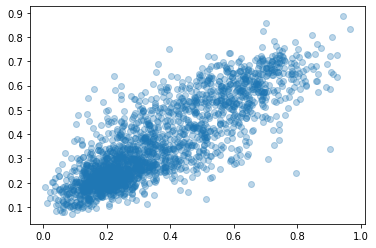

In [25]:
from matplotlib import pyplot as plt
plt.scatter(y_test, model.predict(X_test), alpha=0.3)
plt.show()

This looks great - most predictions are nice and close to the true value! But we still don't have a way to link this to the leaderboard score on Zindi. Let's remedy that by calculating the Root Mean Squared Error, the same metric Zindi uses. 

In [26]:
from sklearn.metrics import mean_squared_error

# The `squared=False` bit tells this function to return the ROOT mean squared error
mean_squared_error(y_test, model.predict(X_test), squared=False)

0.10815594201379145

Great stuff. Let's make a submission and then move on to looking for ways to improve.

In [27]:
# Copying our predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = model.predict(test[in_cols]) 
ss.head()

,ID,Target
0,ID_AAcismbB,0.221479
1,ID_AAeBMsji,0.158832
2,ID_AAjFMjzy,0.618076
3,ID_AAmMOEEC,0.314846
4,ID_ABguzDxp,0.264218


We now have our predictions in the right format to submit. The following line saves this to a file that you can then upload to get a score:

In [28]:
ss.to_csv('second3_submission.csv', index=False)

# Getting Better

You might have noticed that your score on Zindi wasn't as good as the one you got above. This is because the test set comes from different countries to the train set. When we did a random split, we ended up with our local train and test both coming from the same countries - and it's easier for a model to extrapolate within countries than it is for it to make predictions for a new location. 

So our first step might be to make a scoring function that splits the data according to country, and measures the model performance on unseen countries. Try it and share your testing methods in the discussions. And look at the following questions:
- Does your score drop when you score your model on countries it wasn't trained with?
- Does the new score more accurately match the leaderboard score?
- Are any countries particularly 'hard' to make predictions in?

In [29]:
# You code for a new model evaluation method here

train_per_countries

NameError: ignored

Knowing how well our model is doing is useful, but however you measure that we also need ways to improve this performance! There are a few ways to do this:

- Feed the model better data. How? Feature engineering! If we can add meaningful features the model will have more data to work with.
- Tune your models. We used the default parameters - perhaps we can tweak some hyperparameters to make our models better
- Try fancier models. Perhaps XGBoost or a neural network is better than Random Forest at this task

Let's do a little of each. First up, let's create a numeric feature that encodes the 'urban_or_rural' column as something the model can use:

In [30]:
# Turning a categorical column into a numeric feature
train['is_urban'] = (train['urban_or_rural'] == 'U').astype(int)
test['is_urban'] = (test['urban_or_rural'] == 'U').astype(int)
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target,is_urban
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783,0
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898,0
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320,0
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107,0
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328,1



Note that whenever we add features to train, *we also need to add them to test* otherwise we won't be able to make our predictions.

With this extra feature, we can fit a new model:

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

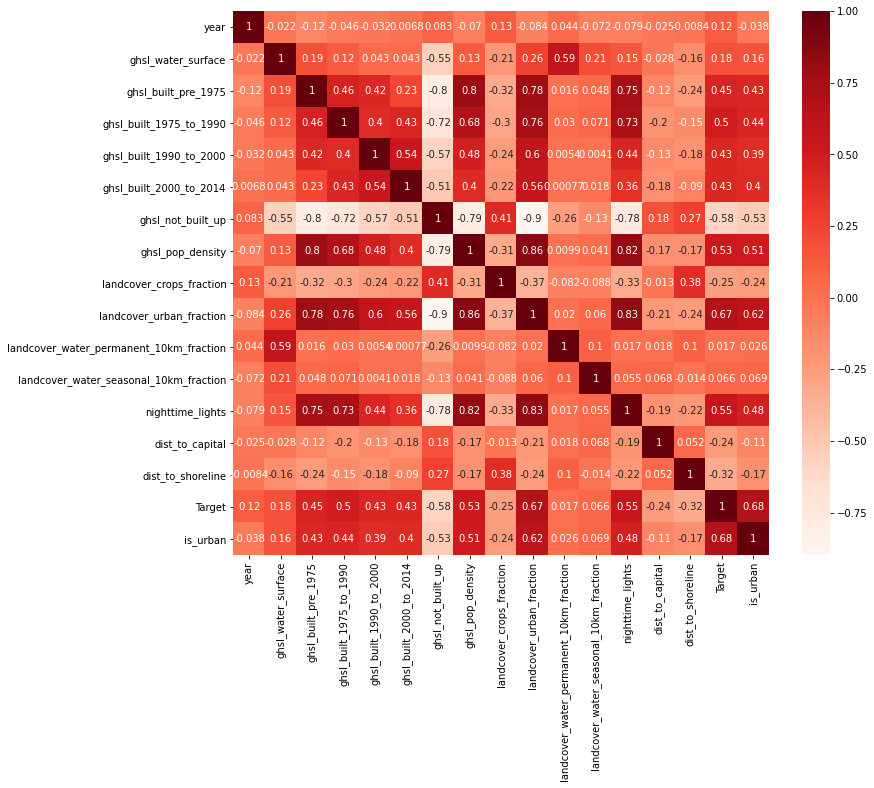

In [41]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [42]:
# selecting best features

In [43]:
from sklearn.feature_selection import SelectKBest , mutual_info_classif

In [53]:
df_input.columns

Index(['ID', 'country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline'],
      dtype='object')

In [56]:
df_input = train.drop('ID', axis=1, inplace=True)
df_input = train.drop('Target',axis=1)
y_output = train['Target']

In [57]:
df_input


,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378
1,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243
2,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773
3,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610
4,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,Nigeria,2013,R,0.0,0.002961,0.008240,0.002313,0.008068,0.978418,44.044352,12.551978,6.302902,0.000000,0.000000,1.955632,283.861037,159.790057
21450,Senegal,2011,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.848571,0.372267,0.000000,0.000000,0.000000,295.307249,122.976960
21451,Ghana,2014,R,0.0,0.000536,0.000092,0.000018,0.000074,0.999279,0.458143,3.679934,1.712136,0.000000,0.000000,0.442422,166.405249,155.365355
21452,Ghana,2014,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.331763,0.960163,0.001899,0.061126,0.000000,568.759665,534.638628


In [48]:
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline']


In [58]:
selector = SelectKBest(mutual_info_classif, k=5)
selector.fit_transform(df_input, y_output)
df_input.columns[selector.get_support(indices=True)]

#To get the list
vector_names = list(df_input.columns[selector.get_support(indices=True)])
print('The 5 features are ' , vector_names)

ValueError: ignored

In [31]:
in_cols.append('is_urban') # Adding the new features to our list of input columns

# Replace this with your chosen method for evaluating a model:
X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=58)
model = CatBoostRegressor()
result= model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test), squared=False)

Learning rate set to 0.066109
0:	learn: 0.1859144	total: 7.86ms	remaining: 7.85s
1:	learn: 0.1789597	total: 15ms	remaining: 7.48s
2:	learn: 0.1722036	total: 22.1ms	remaining: 7.33s
3:	learn: 0.1662579	total: 34ms	remaining: 8.45s
4:	learn: 0.1606806	total: 41.7ms	remaining: 8.3s
5:	learn: 0.1555844	total: 49.1ms	remaining: 8.13s
6:	learn: 0.1510981	total: 56.6ms	remaining: 8.03s
7:	learn: 0.1469668	total: 63.9ms	remaining: 7.92s
8:	learn: 0.1430896	total: 72.6ms	remaining: 7.99s
9:	learn: 0.1397215	total: 79.8ms	remaining: 7.9s
10:	learn: 0.1365198	total: 87.1ms	remaining: 7.83s
11:	learn: 0.1335800	total: 94.3ms	remaining: 7.76s
12:	learn: 0.1311848	total: 113ms	remaining: 8.55s
13:	learn: 0.1289651	total: 124ms	remaining: 8.77s
14:	learn: 0.1268336	total: 137ms	remaining: 8.96s
15:	learn: 0.1249846	total: 144ms	remaining: 8.87s
16:	learn: 0.1233813	total: 152ms	remaining: 8.79s
17:	learn: 0.1219870	total: 159ms	remaining: 8.69s
18:	learn: 0.1206980	total: 167ms	remaining: 8.61s
19:	l

0.10300346803377304

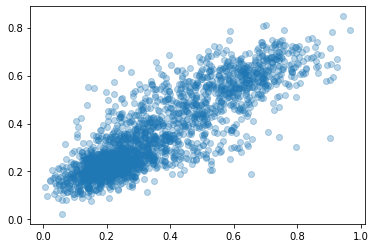

In [32]:
plt.scatter(y_test, model.predict(X_test), alpha=0.3)
plt.show()

In [33]:
model.score(X_test, y_test) # Show a score

0.7313310611361041

Did your score improve?

Next, let's tune our model by adjusting the maximum depth. This is one of many hyperparameters that can be tweaked on a Random Forest model. Here I just try a few randomly chosen values, but you could also use a grid search to try values more methodically.

In [34]:
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = RandomForestRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)
    print(max_depth, mean_squared_error(y_test, model.predict(X_test), squared=False))

3 0.10426857237585264
5 0.1042253627004492
8 0.10464683740800874
10 0.10442331242318882
14 0.1044716501340744
18 0.10435400766492799


In [35]:
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = CatBoostRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)
    print(max_depth, mean_squared_error(y_test, model.predict(X_test), squared=False))

Streaming output truncated to the last 5000 lines.
9:	learn: 0.1397215	total: 86.3ms	remaining: 8.54s
10:	learn: 0.1365198	total: 93.8ms	remaining: 8.44s
11:	learn: 0.1335800	total: 102ms	remaining: 8.37s
12:	learn: 0.1311848	total: 109ms	remaining: 8.28s
13:	learn: 0.1289651	total: 126ms	remaining: 8.86s
14:	learn: 0.1268336	total: 134ms	remaining: 8.77s
15:	learn: 0.1249846	total: 141ms	remaining: 8.67s
16:	learn: 0.1233813	total: 149ms	remaining: 8.59s
17:	learn: 0.1219870	total: 156ms	remaining: 8.51s
18:	learn: 0.1206980	total: 163ms	remaining: 8.44s
19:	learn: 0.1194964	total: 171ms	remaining: 8.37s
20:	learn: 0.1183936	total: 178ms	remaining: 8.31s
21:	learn: 0.1173899	total: 186ms	remaining: 8.25s
22:	learn: 0.1164564	total: 193ms	remaining: 8.21s
23:	learn: 0.1156135	total: 201ms	remaining: 8.17s
24:	learn: 0.1148515	total: 209ms	remaining: 8.13s
25:	learn: 0.1141655	total: 216ms	remaining: 8.1s
26:	learn: 0.1135400	total: 224ms	remaining: 8.05s
27:	learn: 0.1130333	total: 231

In [36]:
ss['Target'] = model.predict(test[in_cols]) 
ss.head()

,ID,Target
0,ID_AAcismbB,0.130702
1,ID_AAeBMsji,0.199215
2,ID_AAjFMjzy,0.632204
3,ID_AAmMOEEC,0.414034
4,ID_ABguzDxp,0.259061


In [38]:
ss.to_csv('second4_submission.csv', index=False)

In this case, it looks like we can improve our performance by specifying a max_depth to limit model complexity.

Finally, let's try a different model out of curiosity:

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
# Exercise: fit and score the model. Does it beat your other scores? Can you use it to make a submission?

Remember, you can ask questions and share ideas in the discussions. 

### GOOD LUCK!

In [ ]:
# new attempt

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
import keras
keras.__version__

'2.4.3'

In [127]:
train = pd.read_csv('/content/drive/MyDrive/zindi_hackathon/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/zindi_hackathon/Test.csv')
# ss.to_csv('second4_submission.csv', index=False)

In [128]:
train

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,ID_zzPvDPjQ,Nigeria,2013,R,0.0,0.002961,0.008240,0.002313,0.008068,0.978418,44.044352,12.551978,6.302902,0.000000,0.000000,1.955632,283.861037,159.790057,0.624088
21450,ID_zzQoPhjZ,Senegal,2011,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.848571,0.372267,0.000000,0.000000,0.000000,295.307249,122.976960,0.250042
21451,ID_zzQuWZBF,Ghana,2014,R,0.0,0.000536,0.000092,0.000018,0.000074,0.999279,0.458143,3.679934,1.712136,0.000000,0.000000,0.442422,166.405249,155.365355,0.314871
21452,ID_zzqCGLvb,Ghana,2014,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.331763,0.960163,0.001899,0.061126,0.000000,568.759665,534.638628,0.237831


In [129]:
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
#tf.set_random_seed(1234)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, GRU, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [130]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

In [133]:
# encoding categorical feature using OneHotEncoding  
encoded_data = pd.get_dummies(train, prefix_sep = "_",columns =["urban_or_rural"]) #Data Encoding: From string to categorical using One Hot Encoder.
  

In [143]:
# data standardization
data = encoded_data[['ghsl_water_surface',	'ghsl_built_pre_1975',	'ghsl_built_1975_to_1990',	'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction','landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline', 'Target']]
mean = data.mean(axis=0)
data -= mean 
std = data.std(axis=0)
data /= std

In [144]:
train["country"].unique()

array(['Ethiopia', 'Mozambique', 'Malawi', 'Guinea', 'Cameroon', 'Ghana',
       'Senegal', 'Kenya', 'Tanzania', 'Mali', 'Swaziland', 'Rwanda',
       'Nigeria', 'Lesotho', 'Sierra Leone', 'Central African Republic',
       "Cote d'Ivoire", 'Togo'], dtype=object)

In [145]:
# Applying standardization function earlier defined
categ = encoded_data[['urban_or_rural_R','urban_or_rural_U', "year", "country", "ID"]]

In [146]:
standard_data = pd.concat([data, categ], axis=1)
#return standard_data, data,encoded_data

In [147]:
standard_data

,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target,urban_or_rural_R,urban_or_rural_U,year,country,ID
0,-0.289862,-0.336578,-0.370229,-0.385811,-0.441601,0.524912,-0.398706,0.265976,-0.553207,-0.226994,-0.299908,-0.403338,-0.045784,1.140622,-1.121301,1,0,2016,Ethiopia,ID_AAIethGy
1,-0.289862,-0.336578,-0.368809,-0.387505,-0.454419,0.526850,0.086073,2.573071,-0.564932,-0.226994,-0.297631,-0.403338,-0.371570,-0.203638,-1.779224,1,0,2005,Ethiopia,ID_AAYiaCeL
2,-0.289862,-0.336578,-0.370229,-0.387505,-0.454872,0.527385,-0.456627,-0.993019,-0.584730,-0.226994,-0.298617,-0.403338,1.477615,-0.723740,-1.303747,1,0,2009,Mozambique,ID_AAdurmKj
3,-0.289862,-0.335340,-0.367885,-0.379738,-0.449223,0.524023,-0.431766,0.259392,-0.505236,1.497212,-0.244937,-0.403338,0.316681,0.656211,-0.239889,1,0,2015,Malawi,ID_AAgNHles
4,-0.289862,-0.234001,-0.143255,0.143343,2.016000,-0.084692,-0.305296,-0.952334,0.371779,-0.226223,-0.245171,-0.334022,-0.279949,-0.652165,1.309796,0,1,2012,Guinea,ID_AAishfND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,-0.289862,-0.310506,-0.263718,-0.316866,-0.255269,0.437193,-0.246596,-0.506372,-0.324520,-0.226994,-0.299908,-0.310611,-0.024543,-0.755227,1.406310,1,0,2013,Nigeria,ID_zzPvDPjQ
21450,-0.289862,-0.336578,-0.370229,-0.387505,-0.454872,0.527385,-0.456627,0.406797,-0.574595,-0.226994,-0.299908,-0.403338,0.023387,-0.869725,-0.518036,1,0,2011,Senegal,ID_zzQoPhjZ
21451,-0.289862,-0.331854,-0.369033,-0.386941,-0.453042,0.524371,-0.454442,-1.036011,-0.518097,-0.226994,-0.299908,-0.382360,-0.516377,-0.768989,-0.184515,1,0,2014,Ghana,ID_zzQuWZBF
21452,-0.289862,-0.336578,-0.370229,-0.387505,-0.454872,0.527385,-0.456627,-0.519518,-0.549805,-0.226704,-0.274265,-0.403338,1.168441,0.410647,-0.580860,1,0,2014,Ghana,ID_zzqCGLvb


In [148]:
train.columns

Index(['ID', 'country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'Target'],
      dtype='object')

In [149]:
# Data Splitting

In [159]:
X = standard_data.drop('Target', axis=1); y = standard_data['Target']

# we are using 80% data for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=10)

In [154]:
from keras import models  # model for building newtork 
from keras import layers  # layers of network

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
    return model

In [ ]:
model.fit(X_train, y_train,
              epochs=num_epochs, batch_size=25, verbose=0)


loss, accuracy = model.evaluate(val_data, val_targets, verbose=0)
    all_accuracies.append(accuracy)

loss_history = history.history['val_loss']

In [152]:
# Model Validation: K-fold Cross-validation

In [165]:
import numpy as np

k = 5
num_val_samples = len(X_train) // k
num_epochs = 100
all_loss_histories = []
all_accuracies = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = tf.convert_to_tensor(np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0), np.int64)
    partial_train_targets = tf.convert_to_tensor(np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0), np.int64)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=25, verbose=0)
    # Evaluate the model on the validation data
    loss, accuracy = model.evaluate(val_data, val_targets, verbose=0)
    all_accuracies.append(accuracy)

    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=25, verbose=0)
    loss_history = history.history['val_loss']
    all_loss_histories.append(loss_history)

processing fold # 0


ValueError: ignored

In [ ]:
mean = train_data.mean(axis=0)
# Note that "train_data -= mean" is the same as "train_data = train_data - mean"
# The "/=" operation is the same but with division.
train_data -= mean 
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [79]:
country = df_input.country.astype("category").cat.codes
country = pd.Series(country)

In [80]:
year = df_input.year.astype("category").cat.codes
year = pd.Series(year)

In [81]:
urban_or_rural = df_input.urban_or_rural.astype("category").cat.codes
urban_or_rural = pd.Series(urban_or_rural)

In [82]:
# values = .reshape(-1, 1)
# scaler = MinMaxScaler(feature_range=(-1, 1))
# values = scaler.fit_transform(values)
X = df_input
y = n_y_output

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=10)

In [86]:
train.columns

Index(['country', 'year', 'urban_or_rural', 'ghsl_water_surface',
       'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990',
       'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014',
       'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction',
       'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'Target'],
      dtype='object')

In [91]:
#X1_train = X_train.drop('country', axis=1, inplace=True)
X1_train = X_train.drop('year', axis=1)
X1_train = X_train.drop('urban_or_rural', axis=1)

#X1_val = X_val.drop('country', axis=1, inplace=True)
X1_val = X_val.drop('year', axis=1)
X1_val = X_val.drop('urban_or_rural', axis=1)

y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X1_train))
xtrain_scale=scaler_x.transform(X1_train)
print(scaler_x.fit(X1_val))
xval_scale=scaler_x.transform(X1_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler(copy=True, feature_range=(0, 1))


ValueError: ignored

In [72]:
model = Sequential()
model.add(LSTM(10, input_shape=(21454, 19)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [93]:
model = Sequential()
model.add(Dense(10, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_8 (Dense)              (None, 2670)              29370     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2671      
Total params: 32,131
Trainable params: 32,131
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

ValueError: ignored

In [75]:
nb_epoch = 50

model.fit(df_input, y_output, epochs=nb_epoch)

ValueError: ignored